In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [40]:
goals = pd.read_csv('Goals_2021 .csv')

In [41]:
goals.head()

,Date,DayOfWeek,WakeUp,BedTime,HoursOfSleep,PagesRead,Water,Vitamins,Creatine,FinishedSchool,...,BrushTeeth,Shower,Workout,InterviewQuestions,FruitOrVegetable,LearnedSomething,WhatWasLearned,HappinessLevelMorning,HappinessLevelNight,HappinessChange
0,2/12/2021,Friday,4.75,11.33,5.50,43.0,24.0,Yes,Yes,Yes,...,1.0,No,Yes,0.0,Yes,Yes,Feature Engineering,5,6.0,1
1,2/13/2021,Saturday,8.00,1.40,7.90,54.0,48.0,No,No,Yes,...,1.0,Yes,Yes,2.0,Yes,Yes,Deep Learning,3,1.0,-2
2,2/14/2021,Sunday,9.33,9.99,8.33,72.0,72.0,Yes,Yes,Yes,...,1.0,No,No,0.0,Yes,Yes,Deep Learning,5,6.0,1
3,2/15/2021,Monday,6.01,11.50,5.01,113.0,96.0,No,No,Yes,...,2.0,No,Yes,0.0,Yes,Yes,REM Sleep,5,4.0,-1
4,2/16/2021,Tuesday,5.25,10.88,4.55,0.0,48.0,No,Yes,Yes,...,2.0,Yes,Yes,0.0,Yes,Yes,Machine Learning Explainability,7,5.0,-2


In [42]:
# Change yes to 1 and no to 0 to make it numeric 
goals = goals.replace(to_replace = ['Yes','No'],value = ['1','0'])
goals['WhatWasLearned'] = goals['WhatWasLearned'].fillna(0)
goals.dropna(inplace = True)
goals 

,Date,DayOfWeek,WakeUp,BedTime,HoursOfSleep,PagesRead,Water,Vitamins,Creatine,FinishedSchool,...,BrushTeeth,Shower,Workout,InterviewQuestions,FruitOrVegetable,LearnedSomething,WhatWasLearned,HappinessLevelMorning,HappinessLevelNight,HappinessChange
0,2/12/2021,Friday,4.75,11.33,5.50,43.0,24.0,1,1,1,...,1.0,0,1,0.0,1,1,Feature Engineering,5,6.0,1
1,2/13/2021,Saturday,8.00,1.40,7.90,54.0,48.0,0,0,1,...,1.0,1,1,2.0,1,1,Deep Learning,3,1.0,-2
2,2/14/2021,Sunday,9.33,9.99,8.33,72.0,72.0,1,1,1,...,1.0,0,0,0.0,1,1,Deep Learning,5,6.0,1
3,2/15/2021,Monday,6.01,11.50,5.01,113.0,96.0,0,0,1,...,2.0,0,1,0.0,1,1,REM Sleep,5,4.0,-1
4,2/16/2021,Tuesday,5.25,10.88,4.55,0.0,48.0,0,1,1,...,2.0,1,1,0.0,1,1,Machine Learning Explainability,7,5.0,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,4/18/2021,Sunday,6.26,10.45,8.10,0.0,48.0,1,0,1,...,2.0,0,1,0.0,0,0,0,5,4.0,-1
66,4/19/2021,Monday,5.55,11.20,6.30,0.0,24.0,0,0,1,...,2.0,0,1,0.0,0,0,0,5,4.0,-1
67,4/20/2021,Tuesday,5.00,10.20,5.00,0.0,24.0,1,0,1,...,1.0,1,0,0.0,0,0,0,4,4.0,0
68,4/21/2021,Wednesday,6.40,11.30,7.24,20.0,24.0,0,0,1,...,1.0,0,0,0.0,1,1,Working ahead is great,6,5.0,-1


In [43]:
goals.dtypes

Date                      object
DayOfWeek                 object
WakeUp                   float64
BedTime                  float64
HoursOfSleep             float64
PagesRead                float64
Water                    float64
Vitamins                  object
Creatine                  object
FinishedSchool            object
HeartRate                  int64
Bible                     object
Rosary                    object
Weight                   float64
ScreenTime               float64
BrushTeeth               float64
Shower                    object
Workout                   object
InterviewQuestions       float64
FruitOrVegetable          object
LearnedSomething          object
WhatWasLearned            object
HappinessLevelMorning      int64
HappinessLevelNight      float64
HappinessChange            int64
dtype: object

In [44]:
goals["Vitamins"] = goals["Vitamins"].astype(str).astype(int)
goals["Creatine"] = goals["Creatine"].astype(str).astype(int)
goals["FinishedSchool"] = goals["FinishedSchool"].astype(str).astype(int)
goals["Bible"] = goals["Bible"].astype(str).astype(int)
goals["Rosary"] = goals["Rosary"].astype(str).astype(int)
goals["Shower"] = goals["Shower"].astype(str).astype(int)
goals["Workout"] = goals["Workout"].astype(str).astype(int)
goals["FruitOrVegetable"] = goals["FruitOrVegetable"].astype(str).astype(int)
goals["LearnedSomething"] = goals["LearnedSomething"].astype(str).astype(int)
goals.dtypes

Date                      object
DayOfWeek                 object
WakeUp                   float64
BedTime                  float64
HoursOfSleep             float64
PagesRead                float64
Water                    float64
Vitamins                   int32
Creatine                   int32
FinishedSchool             int32
HeartRate                  int64
Bible                      int32
Rosary                     int32
Weight                   float64
ScreenTime               float64
BrushTeeth               float64
Shower                     int32
Workout                    int32
InterviewQuestions       float64
FruitOrVegetable           int32
LearnedSomething           int32
WhatWasLearned            object
HappinessLevelMorning      int64
HappinessLevelNight      float64
HappinessChange            int64
dtype: object

In [45]:
goals_num = goals.drop(columns = ['Date', 'DayOfWeek', 'WhatWasLearned'])

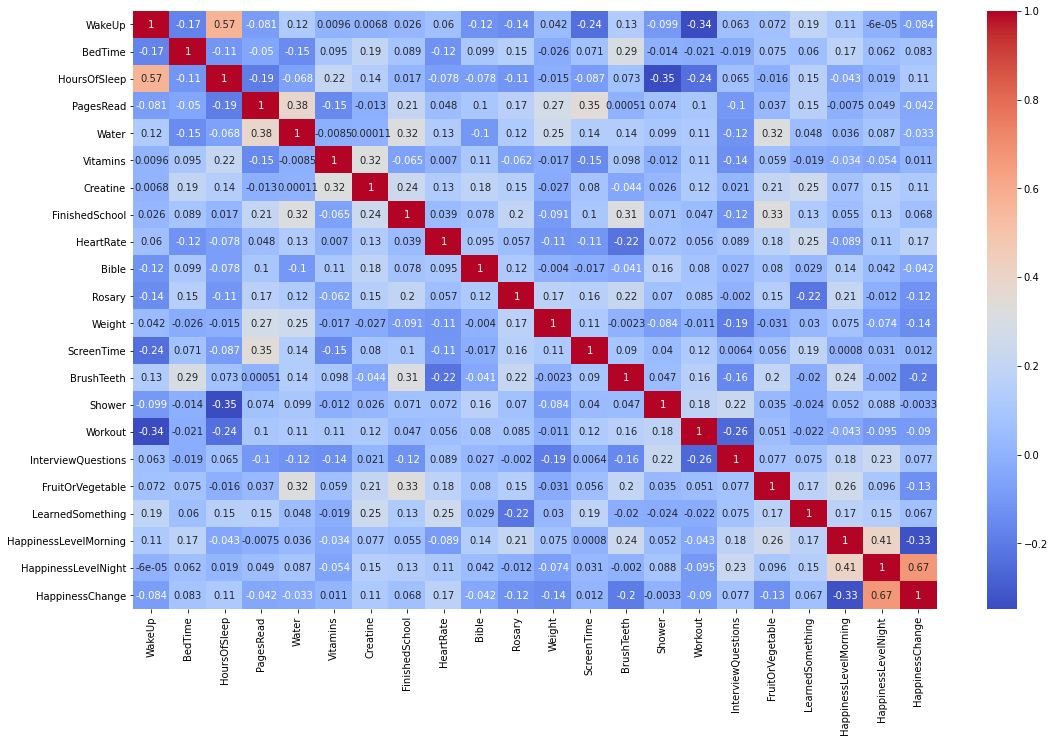

In [46]:
goals_num_correlations = goals_num.corr()
plt.figure(figsize=(18,11))
sns.heatmap(goals_num_correlations, annot = True, cmap = "coolwarm" );

In [47]:
goals_mean = goals_num.mean()

In [48]:
goals_mean = pd.DataFrame(goals_mean)
goals_mean = goals_mean.rename(columns = {0 : 'Average'})
goals_mean

,Average
WakeUp,6.369286
BedTime,10.178429
HoursOfSleep,6.513429
PagesRead,26.557143
Water,42.942857
Vitamins,0.471429
Creatine,0.271429
FinishedSchool,0.785714
HeartRate,58.642857
Bible,0.114286


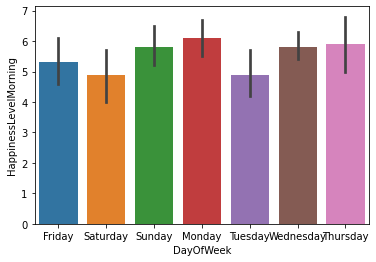

In [49]:
sns.barplot( x = goals.DayOfWeek, y = goals.HappinessLevelMorning);

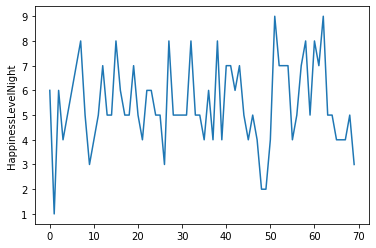

In [50]:
sns.lineplot(data = goals.HappinessLevelNight);

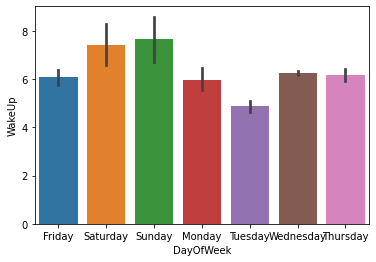

In [51]:
sns.barplot( x = goals.DayOfWeek, y = goals.WakeUp);

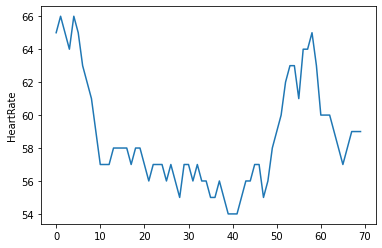

In [52]:
sns.lineplot(data = goals.HeartRate);

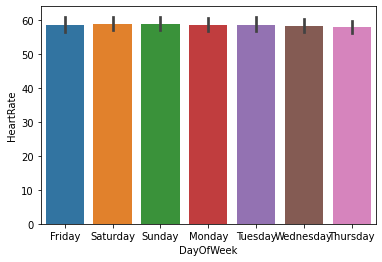

In [53]:
sns.barplot( x = goals.DayOfWeek, y = goals.HeartRate);

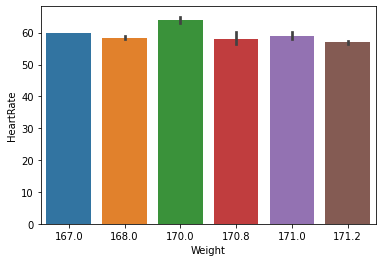

In [54]:
sns.barplot( x = goals.Weight, y = goals.HeartRate);

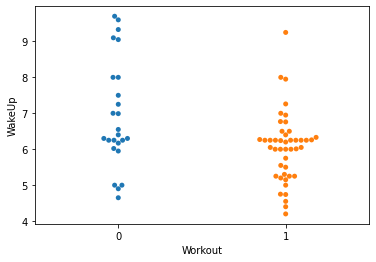

In [55]:
sns.swarmplot(x = goals.Workout, y = goals.WakeUp);

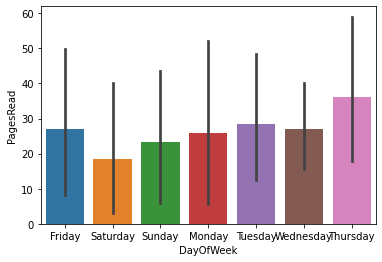

In [56]:
sns.barplot( x = goals.DayOfWeek, y = goals.PagesRead);

<AxesSubplot:xlabel='HappinessLevelNight', ylabel='BedTime'>

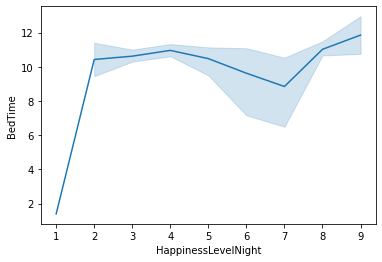

In [57]:
sns.lineplot(x = goals.HappinessLevelNight, y = goals.BedTime)